In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sns.set_theme()
countries = {"Germany": "D",
             "Austria": "A",
             "Belgium" : "B",
             "Spain": "E",
             "France": "F",
             "Italy": "I",
             "Luxembourg": "L",
             "Netherlands": "NL"}

### Load Dataset

In [4]:
file_path = os.path.join("data", "autoscout_dataset.csv")
df = pd.read_csv(file_path, sep=";", index_col="url")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5228 entries, ford-ecosport-ecosport-tdci-st-line-diesel-grigio-aa364981-4d7e-4148-85af-38d52705c6b0 to fiat-punto-punto-5p-1-4-easypower-pop-gpl-gpl-bianco-2e03a647-fa94-4b72-86ec-83d6c622c2e5
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  5228 non-null   object 
 1   date                     5228 non-null   object 
 2   makeId                   5228 non-null   int64  
 3   modelOrModelLineId       5202 non-null   float64
 4   maker                    5228 non-null   object 
 5   model                    5152 non-null   object 
 6   modelVersionInput        5062 non-null   object 
 7   Prezzo_auto              3948 non-null   float64
 8   Carrozzeria              5228 non-null   object 
 9   Tipo_di_veicolo          5228 non-null   object 
 10  Trazione                 4375 non-null   object 
 11  Posti                

In [21]:
df.describe()

,makeId,modelOrModelLineId,Prezzo_auto,Posti,Porte,garanzia_mesi,Chilometraggio,Cilindrata_cm3,Marce,Cilindri,Peso_a_vuoto_kg,Emissioni_CO2_gKm,Acconto,price,zip,potenza_kw,potenza_cv,Consumo_comb_L100km,Consumo_urb_L100km,Consumo_extraurb_L100km
count,5228.000000,5202.000000,3948.000000,5073.000000,5084.000000,2194.000000,5.005000e+03,4936.000000,4545.000000,4504.000000,3404.000000,3891.000000,5211.000000,5.228000e+03,5228.000000,5186.000000,5186.000000,4009.000000,3497.000000,3501.000000
mean,1645.144223,19736.490965,15642.354357,4.762074,4.549961,15.472197,8.338017e+04,1631.543558,5.996480,3.887655,1426.455347,124.717296,1253.683746,2.452676e+04,34237.052410,97.450829,132.575395,5.304166,6.500172,4.695830
std,5492.428028,19795.488073,7481.893469,0.778231,0.866259,9.203402,7.196844e+04,603.990214,1.348247,0.844198,333.284492,46.321241,3598.171043,1.468663e+05,25689.247618,48.271408,65.640838,2.565243,3.313102,2.106272
min,6.000000,1600.000000,700.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,3.000000e+02,10.000000,1.000000,1.000000,0.700000,1.000000,1.000000
25%,28.000000,2090.000000,9800.000000,5.000000,4.000000,12.000000,3.000000e+04,1242.000000,5.000000,4.000000,1190.000000,107.000000,0.000000,1.180000e+04,16140.500000,68.000000,92.000000,4.200000,5.000000,3.900000
50%,42.000000,18486.000000,15490.000000,5.000000,5.000000,12.000000,6.866600e+04,1560.000000,6.000000,4.000000,1395.000000,119.000000,0.000000,1.815950e+04,30027.000000,88.000000,120.000000,4.900000,5.900000,4.400000
75%,65.000000,19947.750000,21500.000000,5.000000,5.000000,12.000000,1.213510e+05,1968.000000,7.000000,4.000000,1605.000000,138.000000,0.000000,2.720050e+04,46047.000000,110.000000,150.000000,5.800000,7.200000,5.000000
max,51924.000000,76350.000000,30000.000000,9.000000,6.000000,84.000000,1.500000e+06,15607.000000,10.000000,12.000000,3500.000000,1210.000000,50616.000000,9.999999e+06,98070.000000,530.000000,721.000000,69.000000,88.000000,57.000000


In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,country,date,makeId,modelOrModelLineId,maker,model,modelVersionInput,Prezzo_auto,Carrozzeria,Tipo_di_veicolo,Trazione,Posti,Porte,garanzia_mesi,Chilometraggio,Anno,unico_proprietario,Tipo_di_cambio,Cilindrata_cm3,Marce,Cilindri,Peso_a_vuoto_kg,Carburante,Emissioni_CO2_gKm,Comfort,Intrattenimento__Media,Sicurezza,Extra,Colore,Acconto,price,countryCode,zip,city,street,Tagliandi_certificati,potenza_kw,potenza_cv,Consumo_comb_L100km,Consumo_urb_L100km,Consumo_extraurb_L100km
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ford-ecosport-ecosport-tdci-st-line-diesel-grigio-aa364981-4d7e-4148-85af-38d52705c6b0,Italy,2022-11-11 13:20:09.318250,29,20303.0,Ford,EcoSport,Ecosport TDCI ST-Line,18500.0,SUV/Fuoristrada,Usato,Anteriore,5.0,5.0,12.0,44700.0,09/2019,True,Manuale,1499.0,6.0,4.0,1288.0,Diesel,107.0,Alzacristalli elettrici;Climatizzatore;Control...,Bluetooth;Computer di bordo;USB,ABS;Airbag conducente;Airbag laterali;Airbag p...,Cerchi in lega;Controllo vocale,Grigio,4420.0,18500.0,IT,21047,Saronno - Varese - Va,"Via E.H.Grieg 49""}",False,73.0,99.0,4.1,NaN,3.8
bmw-x1-xline-20d-xdrive-led-tetto-panoramico-diesel-argento-f14c9a3b-a455-4bb0-bd74-42a6fc2bd2d,Italy,2022-11-11 13:20:09.969211,13,19242.0,BMW,X1,xline 20d xdrive LED/TETTO PANORAMICO,28800.0,SUV/Fuoristrada,Usato,Integrale,5.0,5.0,18.0,83000.0,01/2018,False,Automatico,NaN,8.0,NaN,NaN,Diesel,NaN,Alzacristalli elettrici;Bracciolo;Climatizzato...,Autoradio;Bluetooth;CD;Computer di bordo;MP3;U...,ABS;Airbag conducente;Airbag laterali;Airbag p...,"Cerchi in lega (18"");Controllo vocale;Freno di...",Argento,0.0,28800.0,IT,24062,Costa volpino - Bergamo - Bg,"Via Cesare Battisti 6""}",True,140.0,190.0,NaN,NaN,NaN
lancia-ypsilon-1-2-8v-benzina-nero-10d81087-6546-487c-899c-9730df8279a5,Italy,2022-11-11 13:20:10.654156,42,18393.0,Lancia,Ypsilon,1.2 8v,2800.0,Berlina,Usato,NaN,5.0,3.0,NaN,63500.0,06/2008,False,Manuale,1242.0,5.0,4.0,1015.0,Benzina,NaN,Climatizzatore;Sedile passeggero ribaltabile;S...,Autoradio;CD;Computer di bordo;MP3;Sound system,Airbag conducente;Airbag laterali;Airbag passe...,Cerchi in lega;Luce d'ambiente;Ruotino;Sistema...,Nero,835.0,2800.0,IT,16100,Genova,null},False,44.0,60.0,6.0,7.7,5.0
toyota-yaris-1-5-hybrid-5-porte-gr-s-pronta-consegna-garanzia-elettrica-benzina-bianco-846a3153-bb1b-47a6-be43-1d02ec1d8903,Italy,2022-11-11 13:20:11.297319,70,15663.0,Toyota,Yaris,1.5 Hybrid 5 porte GR-S PRONTA CONSEGNA GARANZIA,NaN,Berlina,Usato,Anteriore,5.0,5.0,NaN,33537.0,08/2019,False,Automatico,1497.0,0.0,4.0,NaN,Ibrida,NaN,Alzacristalli elettrici;Climatizzatore;Control...,Bluetooth;Computer di bordo,ABS;Airbag laterali;Airbag passeggero;Chiusura...,Cerchi in lega;Spoiler,Bianco,0.0,17500.0,IT,33170,Pordenone - Pn,V.le Treviso,True,74.0,101.0,NaN,NaN,NaN
volkswagen-polo-polo-5p-1-0-tsi-comfortline-95cv-dsg-benzina-blu-azzurro-c8e2bae7-7391-4612-84ec-c86c28b0b3d1,Italy,2022-11-11 13:20:11.954056,74,2090.0,Volkswagen,Polo,Polo 5p 1.0 tsi Comfortline 95cv dsg,17500.0,Berlina,Usato,NaN,5.0,5.0,NaN,45000.0,08/2020,False,Semiautomatico,999.0,7.0,3.0,1196.0,Benzina,131.0,Alzacristalli elettrici;Chiusura centralizzata...,Android Auto;Apple CarPlay;Autoradio;Autoradio...,ABS;Adaptive Cruise Control;Airbag conducente;...,Cerchi in lega;Controllo vocale;Luce d'ambient...,Blu/Azzurro,0.0,17500.0,IT,165,Roma,null},True,70.0,95.0,4.7,5.2,4.3


### Find Missing data

In [6]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(12,10))
        plt.show()
    else:
        print('No NAs found')



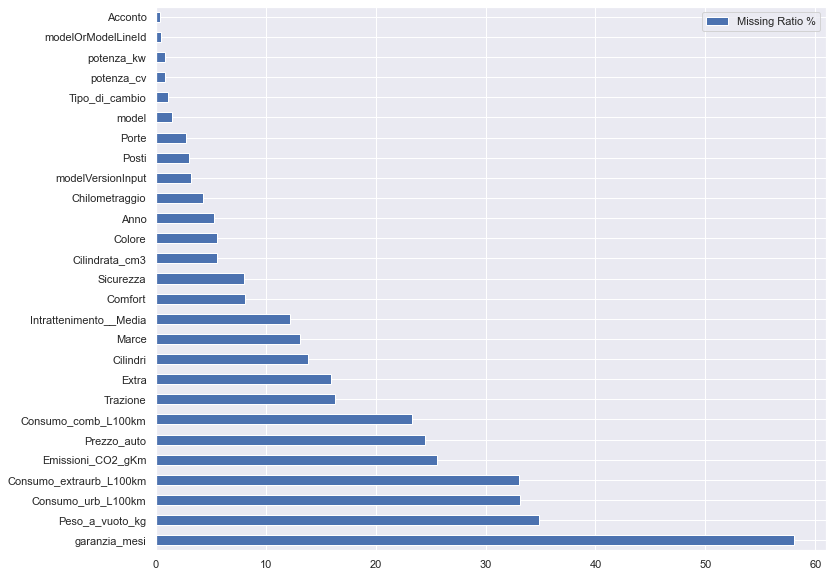

In [7]:
plot_nas(df)

### Value counts for some categorical data

<AxesSubplot:>

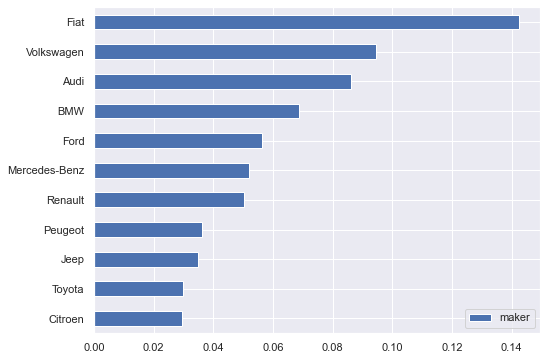

In [40]:
col = 'maker'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

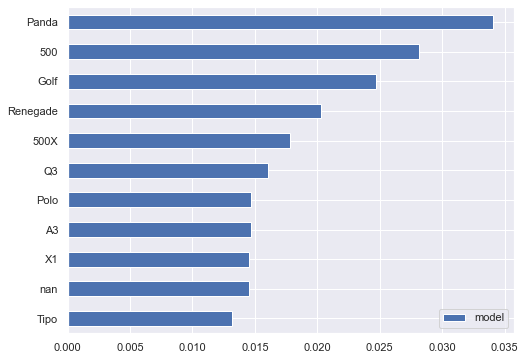

In [39]:
col = 'model'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

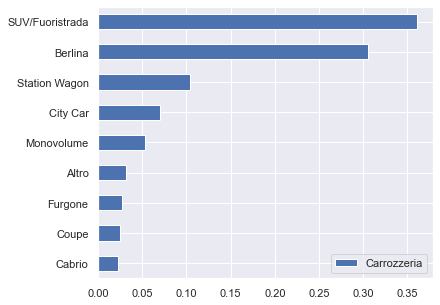

In [19]:
col = 'Carrozzeria'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

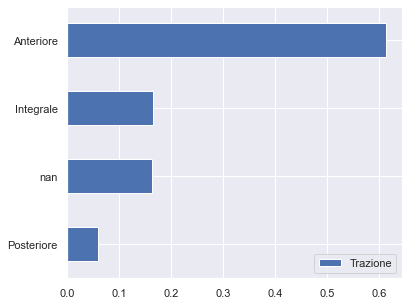

In [10]:
col = 'Trazione'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

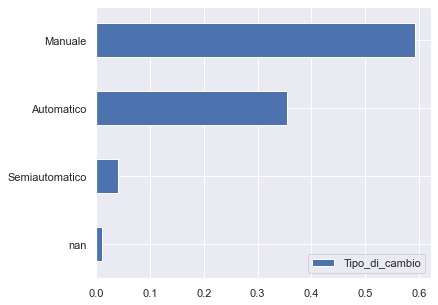

In [22]:
col = 'Tipo_di_cambio'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

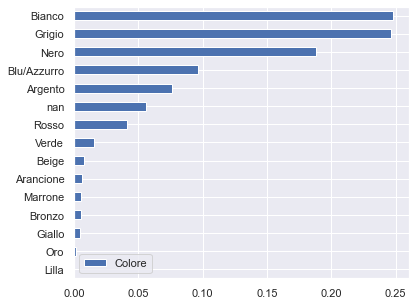

In [ ]:
col = 'Colore'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

### Variables correlation